In [ ]:
"""
#importing from github
!git clone https://github.com/AmiraBelkis/tsp-ant-colony.git
import sys
sys.path.append('/content/tsp-ant-colony')"""
import time
import random
import numpy as np
import Parser
instance = Parser.TSPInstance('/content/tsp-ant-colony/data/data_101.tsp')
instance.readData()
data = np.copy(instance.data)

## Helper methods

In [ ]:
def norm_random():
    return np.random.randint(100)/100

This function represents the amount of attraciveness of a path against the pheromones put in it 
$({\tau^{\alpha}_x}_y)\times({\zeta^{\beta}_x}_y)$


In [ ]:
def attract_pherm(x,y,alpha,beta,pheromone,data):
    return (pheromone[x][y]**alpha)*((1/data[x][y])**beta)

In [ ]:
def show_paths(ants):
    print('completed iteration : ')
    i = 1
    for ant in ants :
        print('ant',i,':',ant.path,', cost :',ant.cost)
        i+=1

## Class of ant 

In [ ]:
class Ant:
    def __init__(self,begin):
        self.path = [begin]
        self.cost = 0.0
    
    #finding next node to visit in stochastic way
    def next_node(self,data=[],pheromone=[],alpha=0.5,beta=0.5,random_rate=0.3):
        next_node = -1
        #case of an ant following the exploit method
        if(norm_random()>=random_rate):
            allowed_nodes = []
            sum_of_probs = 0.0
            #get all possible nodes
            for i in range(len(data)):
                if not (i in self.path): 
                    allowed_nodes.append(i)
                    sum_of_probs += attract_pherm(x= self.path[-1] , y= i , alpha=alpha,beta=beta,pheromone=pheromone,data=data)
            #counting probabilities
            max_prob = 0

            for node in allowed_nodes:
                prob_xy = (attract_pherm(x= self.path[-1] , y= node , alpha=alpha,beta=beta,pheromone=pheromone,data=data))/sum_of_probs
             
                if prob_xy >= max_prob : 
                    next_node = node
                    max_prob = prob_xy
           
        #case of an ant following the exploring method
        else : 
            node = 0 
            while(node in self.path):
                node +=1
            next_node = node

        #adding cost 
        self.cost+= data[self.path[-1]][next_node]

        if(len(self.path)==len(data)):
            self.cost+= data[self.path[-1]][0]
            
        self.path.append(next_node)
    
    #updating pheromone 
    def update_pheromone(self, pheromone,q):
        for i in range(len(self.path)-1):
            pheromone[self.path[i]][self.path[i+1]]+= q/self.cost
            pheromone[self.path[i+1]][self.path[i]]+= q/self.cost
        new_ph = pheromone
        return new_ph
    
    #reset path
    def reset_path(self):
        self.cost = 0.0
        self.path = [self.path[0]]

## Initializing procedures

In [ ]:
def initialize_pheromone_matrix(data):
    m = np.ones(data.shape)
    for i in range(len(m)):
        m[i][i]= 0
    return m 

In [ ]:
def initialize_colony(ants_number, data):
    ants= []
    begin = np.random.randint(len(data))
    for i in range(ants_number):
        ants.append(Ant(begin))
    return ants , begin

## Ant Colony Algorithm 

In [ ]:
def AntColony(data,ants_number = 4, alpha = 0.7 , beta = 0.4 , evaporate_rate = 0.1,random_rate=0.5 , show_history = False):
    assert ants_number >=2 
    path = []
    cost = 0.0
    stop = False 
    pheromone = initialize_pheromone_matrix(data)
    ants , begin = initialize_colony(ants_number=ants_number, data=data)
    while (not stop) : 
        #first : visit nodes with ants
        for ant in ants:
            #looking for a cycle
            while (len(ant.path) != len(data)):
                ant.next_node(data=data,pheromone=pheromone, alpha=alpha, beta = beta,random_rate=random_rate)
        
        #second : evaporation 
        pheromone=np.dot(pheromone,1-evaporate_rate)
        
        #last : update the pheremone in nodes 
        for ant in ants:
            pheromone = ant.update_pheromone(pheromone=pheromone,q=10)
        
        #checking the stop condition
        path = ants[0].path
        stop = True
        for ant in ants[1:]:
            stop = stop and np.array_equal(path,ant.path)
        random_rate = random_rate / 10
        
        #an optional feature to print the history of paths
        if show_history :  
            show_paths(ants=ants)

        #reseting paths 
        for ant in ants :
            if not stop : ant.reset_path()
    else :
        return ants[0].path , ants[0].cost

In [ ]:
p,c = AntColony(data=data,ants_number=4,alpha = 0.5,beta = 0.1,evaporate_rate=0.1,random_rate=0.7,show_history=False)
print(p , c)

[66, 38, 55, 74, 73, 71, 72, 20, 39, 57, 52, 100, 26, 68, 0, 49, 75, 76, 2, 78, 80, 32, 50, 8, 70, 34, 33, 77, 28, 23, 79, 67, 11, 25, 27, 88, 5, 93, 94, 96, 91, 58, 98, 95, 92, 84, 90, 99, 36, 97, 60, 15, 85, 43, 13, 41, 86, 56, 1, 12, 59, 82, 17, 51, 87, 30, 69, 29, 19, 65, 64, 31, 89, 62, 10, 18, 48, 35, 46, 47, 81, 7, 44, 16, 83, 4, 6, 61, 9, 63, 45, 37, 42, 14, 40, 21, 22, 3, 54, 24, 53] 757.0


## Running algorithm multiple times to get lower cost

In [ ]:
p = [] 
c = np.inf
for i in range(20): 
    path , cost = AntColony(data=data,ants_number=5,alpha = 0.5,beta = 0.1,evaporate_rate=0.1,random_rate=0.7,show_history=False)
    if(cost < c ):
        c = cost 
        p = path

In [ ]:
print(p , c)

[75, 76, 2, 78, 77, 33, 34, 70, 8, 80, 32, 50, 19, 29, 69, 30, 87, 61, 9, 89, 62, 31, 65, 64, 49, 0, 68, 26, 100, 52, 57, 39, 25, 11, 79, 67, 28, 23, 53, 54, 24, 38, 22, 55, 74, 73, 71, 72, 20, 21, 40, 56, 1, 86, 96, 94, 93, 5, 95, 98, 58, 91, 97, 36, 99, 90, 84, 92, 60, 15, 85, 43, 13, 37, 42, 14, 41, 12, 88, 51, 17, 82, 59, 4, 83, 16, 44, 7, 81, 47, 46, 35, 48, 63, 10, 18, 6, 45, 27, 3, 66] 735.0


# Create a dataset to compare params 

In [ ]:
"""# writing data result to a CSV file to use it in ANOVA 
import csv
import pandas as pd
 
# field names                                                    
fields = ['data_set','Ants_number', 'Alpha', 'Beta' , 'Evaporate_rate', 'Random_rate', 'nbr_iterations', 'cost', 'time'] 
    
# URL of csv file 
fileURL = "https://raw.githubusercontent.com/AmiraBelkis/tsp-ant-colony/AmiraBelkis-Param-1/data.csv"    

dataFile = pd.read_csv(fileURL, encoding = 'unicode_escape')
# writing to csv file 
with open(fileURL, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)       
    # writing the fields 
    csvwriter.writerow(fields) """
rows = []
datasetList = ['data/data_101.tsp']
# random_rate 
Random_rate = 0.5

"""instance = Parser.TSPInstance(dataset)
instance.readData()
data = np.copy(instance.data)"""
# ants_number loop
for i1 in range(10):
    Ants_number = random.randint(2,15)
    # alpha 
    Alpha = random.randint(1,50)
    # beta 
    Beta = random.randint(1,50)
    # evaporate_rate 
    Evaporate_rate = random.randint(5,95)/100
    # nbr_iterations loop
    nbr_iterations = random.randint(1,10)
    p = [] 
    c = np.inf
    start_time = time.time()
    for i in range(nbr_iterations): 
        path , cost = AntColony(data ,Ants_number ,Alpha ,Beta ,Evaporate_rate ,Random_rate ,show_history=False)                                    
        if(cost < c ):
            c = cost 
            p = path
    end_time = time.time()
    rows.append([Ants_number, Alpha,Beta ,Evaporate_rate, Random_rate, nbr_iterations, c ,  end_time-start_time])
        #csvwriter.writerow([dataset,Ants_number, Alpha,Beta ,Evaporate_rate, Random_rate, nbr_iterations, c ,  end_time-start_time])
print(rows)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


# Analysing data "PCA" 

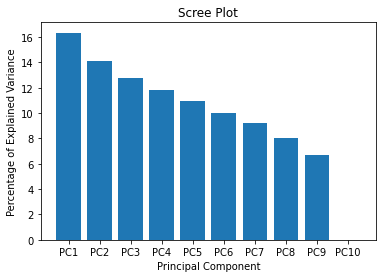

In [7]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA

# import data from csv file 
observations = ['obs' + str(i) for i in range(1,101)]
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
data = pd.DataFrame(columns=[*wt,*ko],index=observations)
for obs in data.index:
    data.loc[obs,'wt1':'wt5'] =  np.random.randint(1,500,5)
    data.loc[obs,'ko1':'ko5'] =  np.random.randint(1,500,5)
#print(data.head())
# scaling data ie (data - mean)^2/ standard deviation
scaled_data = sk.preprocessing.scale(data.T)
# using the Transpose because we need col to be the observations
#print(scaled_data[1:10])
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
# claculate the % of variation of each PC 
per_var = np.round(pca.explained_variance_ratio_ *100 , decimals =2)
# name each PC 
labels = ['PC' + str(i) for i in range(1, len(per_var) + 1)]
# Create graph
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

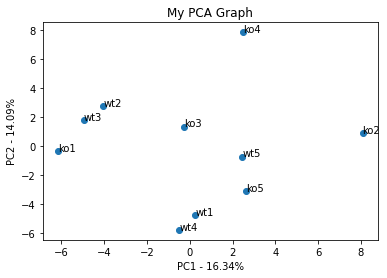

In [8]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [12]:
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0],index=observations)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 variables
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the variables names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

obs55   -0.218312
obs46   -0.189665
obs92   -0.164022
obs30    0.159846
obs95   -0.159220
obs50   -0.152652
obs60    0.152487
obs82   -0.149752
obs35   -0.149643
obs44   -0.148674
dtype: float64
